In [8]:
import math
import seaborn
class LFSR:
    def __init__(self, seed, taps):
        # Инициализация seed и taps в виде списков битов
        self.seed = [int(bit) for bit in bin(seed)[2:].zfill(32)]
        self.taps = [int(bit) for bit in bin(taps)[2:].zfill(32)]
        self.length = len(self.seed)  # Длина регистра
        self.state = self.seed[:]     # Копируем начальное состояние регистра

    def step(self):
        # Вычисляем новый бит через XOR указанных taps
        new_bit = 0
        for i in range(self.length):
            if self.taps[i] == 1:
                new_bit ^= self.state[i]
        # Сдвигаем регистр и добавляем новый бит
        self.state = [new_bit] + self.state[:-1]
        return int("".join(map(str, self.state)), 2)  # Преобразуем в десятичное число

    def run(self, cycles):
        # Генерация последовательности за указанное количество циклов
        output = []
        for _ in range(cycles):
            output.append(self.step())
        return output


# Пример использования 32-битного полинома
seed = 0x2349a234  # Произвольное начальное состояние
taps = 0x80000005  # Порождающий полином
lfsr = LFSR(seed, taps)

# Генерация 50 бит псевдослучайной последовательности
sequence_lsfr = lfsr.run(100000)


[2443497754,
 3369232525,
 3832099910,
 1916049955,
 3105508625,
 1552754312,
 776377156,
 2535672226,
 3415319761,
 1707659880,
 853829940,
 2574398618,
 3434682957,
 3864825126,
 1932412563,
 3113689929,
 1556844964,
 2925906130,
 3610436713,
 1805218356,
 3050092826,
 3672530061,
 3983748678,
 1991874339,
 3143420817,
 1571710408,
 785855204,
 2540411250,
 3417689273,
 1708844636,
 3001905966,
 1500952983,
 750476491,
 2522721893,
 3408844594,
 3851905945,
 1925952972,
 3110460134,
 1555230067,
 2925098681,
 1462549340,
 2878758318,
 1439379159,
 719689579,
 2507328437,
 3401147866,
 3848057581,
 4071512438,
 2035756219,
 3165361757,
 3730164526,
 1865082263,
 932541131,
 2613754213,
 3454360754,
 3874664025,
 1937332012,
 3116149654,
 1558074827,
 2926521061,
 3610744178,
 3952855737,
 1976427868,
 3135697582,
 1567848791,
 783924395,
 2539445845,
 3417206570,
 3856086933,
 4075527114,
 4185247205,
 4240107250,
 4267537273,
 2133768636,
 3214367966,
 1607183983,
 803591991,
 401795

In [ ]:


def frequency_test_decimal(sequence):
    """
    Выполняет тест частотности на последовательности десятичных чисел, преобразованных в бинарные.

    Args:
        sequence (list): Список десятичных чисел.

    Returns:
        dict: Результаты теста, включая статистику теста и p-значение.
    """
    # Преобразуем последовательность десятичных чисел в бинарную строку
    binary_sequence = ''.join(format(num, 'b') for num in sequence)

    # Преобразуем бинарную строку в список из 0 и 1
    binary_list = [int(bit) for bit in binary_sequence]

    # Длина бинарной последовательности
    n = len(binary_list)
    
    # Подсчитываем количество единиц
    count_ones = sum(binary_list)
    
    # Подсчитываем количество нулей
    count_zeros = n - count_ones
    
    # Вычисляем статистику теста (S)
    S = abs(count_ones - count_zeros)
    
    # Нормализуем статистику для Z-тестирования
    S_norm = S / math.sqrt(n)
    
    # Вычисляем p-значение
    p_value = math.erfc(S_norm / math.sqrt(2))
    
    # Выводим результаты
    return {
        "length": n,
        "count_ones": count_ones,
        "count_zeros": count_zeros,
        "S": S,
        "S_normalized": S_norm,
        "p_value": p_value,
        "passed": p_value > 0.01  # Условие прохождения теста
    }


# Выполняем тест
result = frequency_test_decimal(sequence_lsfr)

# Выводим результаты
print("Результаты теста частотности:")
for key, value in result.items():
    print(f"{key}: {value}")


Результаты теста частотности:
length: 3102294
count_ones: 1605937
count_zeros: 1496357
S: 109580
S_normalized: 62.214242783953274
p_value: 0.0
passed: False


<Axes: ylabel='Count'>

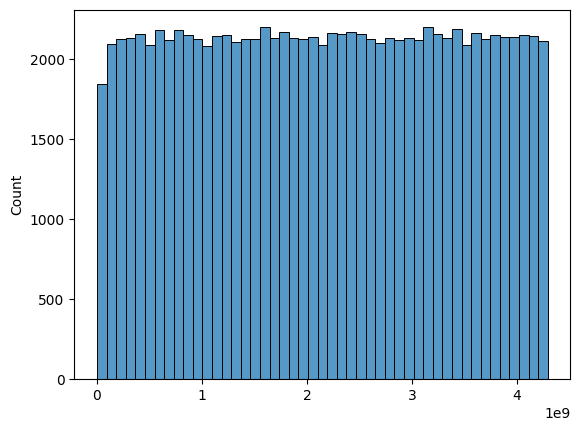

In [10]:
import seaborn

seaborn.histplot(sequence_lsfr)